# Volume 3: Pandas 1
    Ben Christensen
    Math 403
    October 5, 2018

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

## Problem 1


In [2]:
filename = "/Users/benchristensen/Desktop/ACME Python Labs/Volume3/Pandas1/crime_data.csv"
df = pd.read_csv(filename, index_col = 0, skip_blank_lines = True)

## Problem 2



In [3]:
crime_types = [crime_type for crime_type in df.columns[2:]]
#Replace values of crime with percents of total crime
for crime_type in crime_types:
    df[crime_type] = df[crime_type] / df["Total"]
#Find total crime rate  
df["Rate"] = df["Total"] / df["Population"]
df.describe()

,Population,Total,Violent,Property,Murder,Forcible Rape,Robbery,Aggravated Assault,Burglary,Larceny,Vehicle Theft,Rate
count,5.700000e+01,5.700000e+01,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,2.488181e+08,1.055356e+07,0.109324,0.890511,0.001710,0.006747,0.038258,0.062361,0.231930,0.561886,0.096701,0.042369
std,4.326907e+07,3.129618e+06,0.017375,0.017551,0.000319,0.001446,0.004766,0.014932,0.041628,0.030905,0.013211,0.011865
min,1.793232e+08,3.384200e+06,0.077131,0.860569,0.001334,0.004295,0.028342,0.041365,0.164647,0.498721,0.069843,0.018872
25%,2.113920e+08,9.202093e+06,0.095063,0.875980,0.001456,0.005403,0.035149,0.045600,0.191531,0.540251,0.086872,0.033504
50%,2.458070e+08,1.134970e+07,0.112714,0.887286,0.001619,0.007031,0.038324,0.065365,0.231134,0.554383,0.099355,0.041544
75%,2.879739e+08,1.297440e+07,0.123191,0.904939,0.001976,0.007938,0.041836,0.075503,0.271660,0.590298,0.106644,0.052873
max,3.231275e+08,1.487290e+07,0.139431,0.922862,0.002692,0.010403,0.046651,0.087264,0.296409,0.618301,0.118542,0.059500


In [4]:
#Find the "closest percentages"
closest_crimes = []
smallest_difference = 10000000
for i, crime_type in enumerate(crime_types):
    x = df[crime_type]
    for other_crime in crime_types[i+1:]:
        y = df[other_crime]
        #Calculate average difference using the midpoint method
        avg_difference = np.mean(np.abs(x - y) / (x+y/2))
        if avg_difference < smallest_difference:
            smallest_difference = avg_difference
            closest_crimes = [crime_type, other_crime]
            

print("The closest crimes are:", closest_crimes, sep="\n")
percent = (df["Rate"] < df.median()["Rate"]).sum() / df["Rate"].count()
print(f"Percent of crime rates below the median: {percent}")

The closest crimes are:
['Violent', 'Vehicle Theft']
Percent of crime rates below the median: 0.49122807017543857


1. The average crime rate is 4.2%. The Crime rate is usually above the median.
2. Murder
3. The closest percentages are violence and vehicle theft

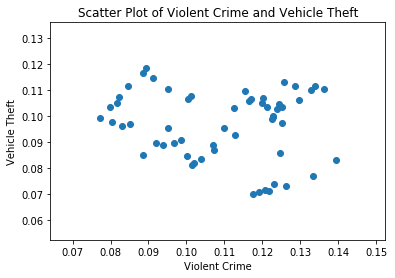

In [5]:
#Show the scatter plot between violent crime and vehicle theft
x = np.array(df["Violent"])
y = np.array(df["Vehicle Theft"])
plt.scatter(x,y)
plt.xlabel("Violent Crime")
plt.ylabel("Vehicle Theft")
plt.title("Scatter Plot of Violent Crime and Vehicle Theft")
plt.show()

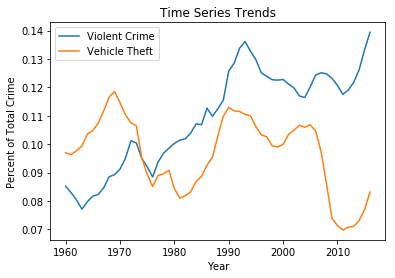

In [6]:
#Show the time trends of violent crime and vehicle theft
time = np.arange(1960, 2017)
plt.plot(time, np.array(df["Violent"]), label="Violent Crime")
plt.plot(time, np.array(df["Vehicle Theft"]), label="Vehicle Theft")
plt.legend()
plt.title("Time Series Trends")
plt.xlabel("Year")
plt.ylabel("Percent of Total Crime")
plt.show()

In [7]:
print(np.corrcoef(x,y))

[[ 1.         -0.13516721]
 [-0.13516721  1.        ]]


The correlation is -.135 between Violent Crime and Vehicle theft.

## Problem 3


In [8]:
filename = "/Users/benchristensen/Desktop/ACME Python Labs/Volume3/Pandas1/crime_data.csv"
df = pd.read_csv(filename, index_col = 0, skip_blank_lines = True)
for crime_type in crime_types:
    print(crime_type, ": ", df[crime_type].argmax(), sep='')
#print("Year with the highest crime:", df["Total"].argmax())

Violent: 1992
Property: 1991
Murder: 1991
Forcible Rape: 1992
Robbery: 1991
Aggravated Assault: 1993
Burglary: 1980
Larceny: 1991
Vehicle Theft: 1991


1991 is the year where the majority of crimes hit their all-time high.

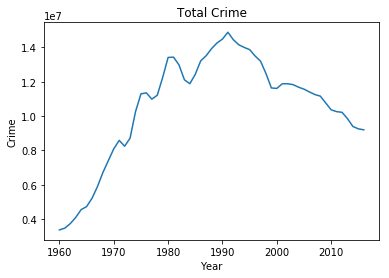

In [9]:
plt.plot(df.index, df["Total"])
plt.title("Total Crime")
plt.xlabel("Year")
plt.ylabel("Crime")
plt.show()

In [10]:
decade_sum = 0
for year in range(1960, 2020, 10):
    total = df.loc[range(year, year+10), "Total"].sum()
    if total > decade_sum:
        ans = year
        decade_sum = total
        
print(f"Decade with the most total crime is {ans}-{ans+9}")

Decade with the most total crime is 1990-1999


In [11]:
print(f"The crime that was committed most in the 1960s was \"{df.loc[range(1960,1970),'Violent':].sum().argmax()}\"")

The crime that was committed most in the 1960s was "Property"


1. 1991
2. 1990s
3. Property

## Problem 4


In [12]:
filename = "/Users/benchristensen/Desktop/ACME Python Labs/Volume3/Pandas1/crime_data.csv"
df = pd.read_csv(filename, index_col = 0, skip_blank_lines = True)
crime_types = [crime_type for crime_type in df.columns[2:]]
#Replace values of crime with percents of total crime
for crime_type in crime_types:
    df[crime_type] = df[crime_type] / df["Total"]
    

In [13]:
#Create dataframe satisfying conditions posed in problem
df1 = df[((df["Property"] < .9) & (df["Burglary"]>.2)) | ((df["Property"] < .9) & (df["Violent"]>.2))]

## Problem 5




In [14]:
#Import the two dataframes
accidents = pd.read_pickle("/Users/benchristensen/Desktop/ACME Python Labs/Volume3/Pandas1/final_accidents2.pickle")
drivers = pd.read_pickle("/Users/benchristensen/Desktop/ACME Python Labs/Volume3/Pandas1/final_drivers.pickle")
#Create two merged dataframes
df1 = pd.merge(accidents, drivers, on='ST_CASE')[["ST_CASE", "AGE", "DRINKING", "DRUNK_DR", "FATALS"]]
df2 = pd.merge(accidents, drivers, on='ST_CASE')[["ST_CASE", "AGE", "FATALS", "SP", "SPEEDREL"]]

## Problem 6



In [15]:
#Create a third dataframe because the first two weren't enough
df3 = pd.merge(accidents, drivers, on='ST_CASE')
#Problems 1-5
print(df3.mode()["WEATHER"].iloc[0])
print(df2[df2["SP"] == 1].count()[0])
print(df2[(df2["SPEEDREL"]>=2) & (df2["SPEEDREL"] <= 4)].mode()["SPEEDREL"])
print(df3["DRUNK_DR"].mean())

1.0
309343
0    4
Name: SPEEDREL, dtype: int64
0.31077401309105823


In [16]:
years = range(2010, 2015)
#for each year find the month that has the most fatalities

for year in years:
    max_fatals = 0
    for month in range(1, 13):
        fatals = accidents[(accidents["YEAR"] == year) & (accidents["MONTH"] == month)].sum()["FATALS"]
        if fatals > max_fatals:
            danger_month = month
            max_fatals = fatals
    print(year, ": ", danger_month, sep='')

2010: 7
2011: 7
2012: 7
2013: 8
2014: 10


1. Clear
2. 309343
3. Too fast for conditions
4. .311
5. 
Month with the most fatalities for each year:
2010: July

2011: July

2012: July

2013: August

2014: October
